In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import log_loss

In [43]:
Vehicle = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Vehicle Silhouettes\Vehicle.csv")

In [44]:
Vehicle.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [45]:
x = Vehicle.drop("Class", axis=1)
y = Vehicle["Class"]

In [46]:
labels = preprocessing.LabelEncoder()
le_y = labels.fit_transform(y)
print(lebals.classes_)

['bus' 'opel' 'saab' 'van']


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, le_y, random_state = 2022, test_size = 0.3)

In [48]:
dtc = DecisionTreeClassifier( random_state = 2022, max_depth = 4)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_prob = dtc.predict_proba(x_test)[:,1]

plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names = x.columns, class_names=["0","1"], fontsize=14)
plt.show()

In [49]:
print(accuracy_score(y_test, y_pred))
#print(log_loss(y_test, y_pred_prob))

0.6811023622047244


In [50]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
dtc = DecisionTreeClassifier(random_state = 2022)
params = {"max_depth" : [2,3,4,5,None],
          "min_samples_split" : [2,5,10],
          "min_samples_split" : [1,5,10]}
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, scoring = "neg_log_loss", cv = kfold)
gcv.fit(x, le_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END ....max_depth=2, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=5;, score=-1.050 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=5;, score=-1.008 total time=   0.0s
[CV 3/5] END .max_depth=2, min_samples_split=5;, score=-0.922 total time=   0.0s
[CV 4/5] END .max_depth=2, min_samples_split=5;, score=-0.895 total time=   0.0s
[CV 5/5] END .max_depth=2, min_samples_split=5;, score=-0.943 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_split=10;, score=-1.050 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_split=10;,

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [1, 5, 10]},
             scoring='neg_log_loss', verbose=3)

In [54]:
print(gcv.best_params_)
print(gcv.best_score_)
best_model = gcv.best_estimator_

{'max_depth': 2, 'min_samples_split': 5}
-0.9634626135556952


[0.         0.         0.         0.         0.         0.66062789
 0.         0.33937211 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


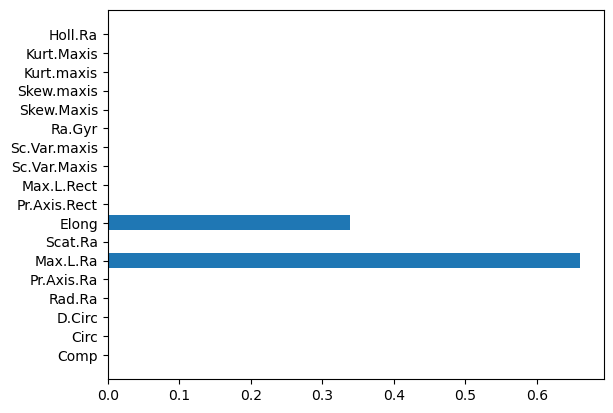

In [57]:
print(best_model.feature_importances_)
imps = best_model.feature_importances_
plt.barh(x.columns, imps)
plt.show()